In [14]:
%pip install langchain langgraph langsmith lanchain-groq langchain_community

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lanchain-groq (from versions: none)
ERROR: No matching distribution found for lanchain-groq


In [20]:
groq_api_key = "enter your api key"

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name = "Gemma2-9b-it")

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [6]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    
graph_builder=StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node('chatbot',chatbot)

In [11]:
graph_builder

In [12]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

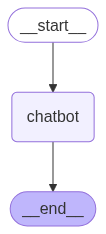

In [13]:
graph_builder.compile()

In [15]:
graph = graph_builder.compile()

In [19]:
while True:
    user_input=input("user:")
    if user_input.lower() in ['quit', 'q']:
        print('Good Bye, thank you using LangGraph Framework create by samson kadarikota')
        break
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:', value['messages'].content)

dict_values([{'messages': AIMessage(content='## AI Agents: The Future of Automation\n\nAI agents are software programs that can perform tasks autonomously, often by interacting with their environment and making decisions based on their goals.  \n\nThink of them like virtual assistants on steroids. \n\n**Here\'s a breakdown of what makes AI agents special:**\n\n* **Autonomy:** They can operate independently without constant human intervention.\n* **Goal-Oriented:** They are programmed with specific objectives and work towards achieving them.\n* **Adaptive:** Many AI agents can learn and adapt their behavior based on experience and feedback.\n* **Interactive:** They can interact with their environment through various means, like APIs, sensors, or user interfaces.\n\n**Types of AI Agents:**\n\n* **Simple Reflex Agents:** React directly to their current perception, lacking memory of past events.\n\n* **Model-Based Reflex Agents:** Maintain an internal model of the world to make more inform

In [21]:
graph_builder